In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('Flight_Data.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
#converting date into day , month and year
df['Date_of_Journey'].str.split('/').str[0]


0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

In [5]:
#taking whole date and checking with the '/' to seperate it and taking each item from the array
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [6]:
df.head(10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,06,2019
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,03,2019
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,01,03,2019
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,03,2019
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,05,2019


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [8]:
#changing data type into int from object
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [10]:
#as we created date month and year for it we can delete the original value as
df.drop('Date_of_Journey',axis=1,inplace=True)

In [11]:
df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,2019


In [12]:
#lets analyze the arrival _time
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [13]:

df['Arrival_Time']=df['Arrival_Time'].apply(lambda x : x.split(' ')[0])


In [14]:
#splitiing data of hour and min and using split to get 1st and 2nd value for minute and hour as we got date already
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [15]:
df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [16]:
#changing type into int
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [17]:
#dropping the column arrival time to make it easier
df.drop('Arrival_Time',axis=1,inplace=True)


In [18]:
df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [19]:
#doing the same analysis for departure time
df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Arrival_hour     10683 non-null  int32 
 12  Arrival_min      10683 non-null  int32 
 13  Dept_hour        10683 non-null  int32 
 14  Dept_min         10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [21]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [22]:
#checking for total stops
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [23]:
#mapping all stops  into numeric values
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})


In [24]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


In [25]:
#checking null value
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [26]:
#since data is incomplete and route is also not given lets drop this row
df.drop(9039,axis=0,inplace=True)

In [27]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min


In [28]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10682 non-null  object 
 4   Duration         10682 non-null  object 
 5   Total_Stops      10682 non-null  float64
 6   Additional_Info  10682 non-null  object 
 7   Price            10682 non-null  int64  
 8   Date             10682 non-null  int32  
 9   Month            10682 non-null  int32  
 10  Year             10682 non-null  int32  
 11  Arrival_hour     10682 non-null  int32  
 12  Arrival_min      10682 non-null  int32  
 13  Dept_hour        10682 non-null  int32  
 14  Dept_min         10682 non-null  int32  
dtypes: float64(1), int32(7), int64(1), object(6)
memory usage: 1.0+ MB


In [30]:
#managing duration and changing into same time either hour or minute
def convert_into_minutes(Duration):
  total_minutes=0
  for i in Duration.split():
    if 'h' in i:
      total_minutes=int(i.replace('h',''))*60
    if 'm' in i:
      total_minutes=int(i.replace('m',''))
  return total_minutes
    

In [31]:
df['Duration']=df['Duration'].apply(convert_into_minutes)

In [32]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,50,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,25,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,25,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,45,1.0,No info,13302,1,3,2019,21,35,16,50


In [33]:
#dropping route and additional_info column

df['Additional_Info'].value_counts()
df.drop(['Route' ,'Additional_Info'], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       10682 non-null  object 
 1   Source        10682 non-null  object 
 2   Destination   10682 non-null  object 
 3   Duration      10682 non-null  int64  
 4   Total_Stops   10682 non-null  float64
 5   Price         10682 non-null  int64  
 6   Date          10682 non-null  int32  
 7   Month         10682 non-null  int32  
 8   Year          10682 non-null  int32  
 9   Arrival_hour  10682 non-null  int32  
 10  Arrival_min   10682 non-null  int32  
 11  Dept_hour     10682 non-null  int32  
 12  Dept_min      10682 non-null  int32  
dtypes: float64(1), int32(7), int64(2), object(3)
memory usage: 876.3+ KB


In [35]:
#for airline column
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [37]:
#changing data into numerical
df['Airline']=df['Airline'].map({'Jet Airways':0, 'IndiGo':1, 'Air India':2,'Multiple carriers':3,'Spice Jet':4,'Vistara':5,'Air Asia':6,'GoAir':7,'Multiple carriers Premium economy':8,'Jet Airways Business':9,'Vistara Premium economy':10,'Trujet':11})

In [38]:
df.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,NaN,Banglore,New Delhi,50,0.0,3897,24,3,2019,1,10,22,20
1,NaN,Kolkata,Banglore,25,2.0,7662,1,5,2019,13,15,5,50
2,NaN,Delhi,Cochin,1140,2.0,13882,9,6,2019,4,25,9,25
3,NaN,Kolkata,Banglore,25,1.0,6218,12,5,2019,23,30,18,5
4,NaN,Banglore,New Delhi,45,1.0,13302,1,3,2019,21,35,16,50


In [39]:
#checking destination 
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [40]:
#changing into numerical value
df['Destination']=df['Destination'].map({'Cochin':0,'Banglore':1,'Delhi':2,'New Delhi':3,'Hyderbad':4,'Kolkata':5})

In [41]:
#checking source 
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [42]:
df['Source']=df['Source'].map({'Delhi':0,'Kolkata':1,'Banglore':2,'Mumbai':3,'Chennai':4})

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       0 non-null      float64
 1   Source        10682 non-null  int64  
 2   Destination   9985 non-null   float64
 3   Duration      10682 non-null  int64  
 4   Total_Stops   10682 non-null  float64
 5   Price         10682 non-null  int64  
 6   Date          10682 non-null  int32  
 7   Month         10682 non-null  int32  
 8   Year          10682 non-null  int32  
 9   Arrival_hour  10682 non-null  int32  
 10  Arrival_min   10682 non-null  int32  
 11  Dept_hour     10682 non-null  int32  
 12  Dept_min      10682 non-null  int32  
dtypes: float64(3), int32(7), int64(3)
memory usage: 876.3 KB


In [44]:
df.head(10)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,NaN,2,3.0,50,0.0,3897,24,3,2019,1,10,22,20
1,NaN,1,1.0,25,2.0,7662,1,5,2019,13,15,5,50
2,NaN,0,0.0,1140,2.0,13882,9,6,2019,4,25,9,25
3,NaN,1,1.0,25,1.0,6218,12,5,2019,23,30,18,5
4,NaN,2,3.0,45,1.0,13302,1,3,2019,21,35,16,50
5,NaN,1,1.0,25,0.0,3873,24,6,2019,11,25,9,0
6,NaN,2,3.0,30,1.0,11087,12,3,2019,10,25,18,55
7,NaN,2,3.0,5,1.0,22270,1,3,2019,5,5,8,0
8,NaN,2,3.0,30,1.0,11087,12,3,2019,10,25,8,55
9,NaN,0,0.0,50,1.0,8625,27,5,2019,19,15,11,25


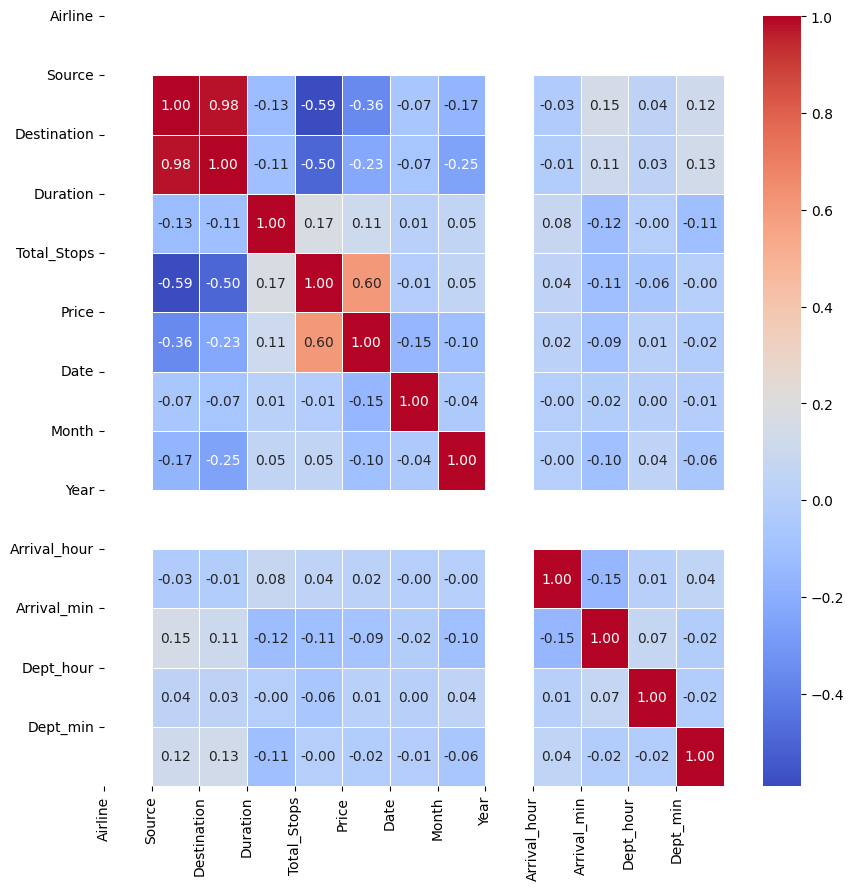

In [45]:
#heatmap to calculate the heatmap
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Draw the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the column names as labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Show the plot
plt.show()

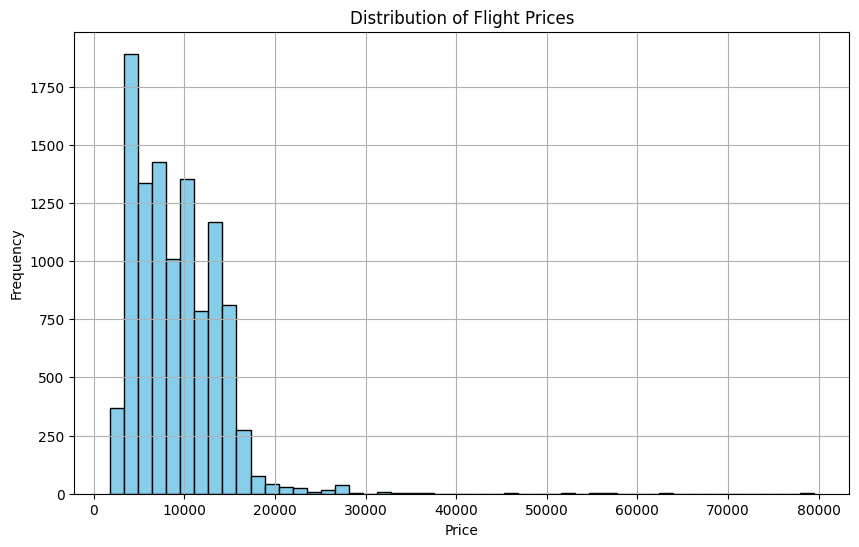

In [47]:
#Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

flight_prices = df['Price']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(flight_prices, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [48]:
#Q3. What is the range of prices in the dataset? What is the minimum and maximum price?
#taking price only column
price_stats = df['Price'].describe()

# Extracting information
price_range = price_stats['max'] - price_stats['min']
min_price = price_stats['min']
max_price = price_stats['max']

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Price Range: {price_range}")


Minimum Price: 1759.0
Maximum Price: 79512.0
Price Range: 77753.0


C:\Users\User\AppData\Local\Temp\ipykernel_7968\29487811.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=df, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_7968\29487811.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(x='Airline', y='Price', data=df, palette='Set2')


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

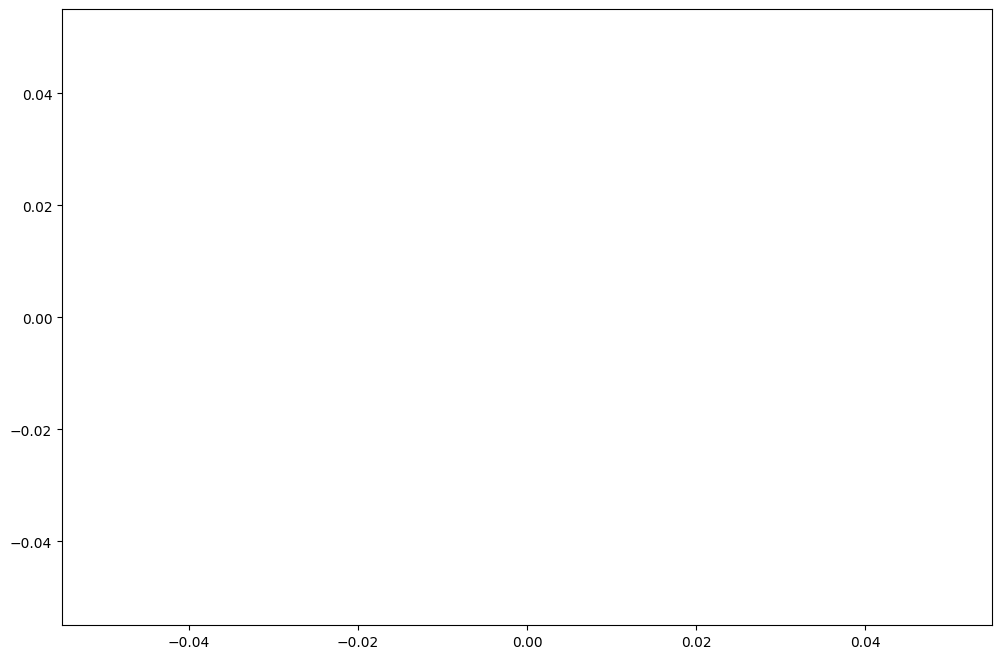

In [54]:
#Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=df, palette='Set2')
plt.title('Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


#since we made airline data into 1-11 instead of airline name we can see number for each we have assisgned

